# Sentiment Analysis of mobile medical app reviews

In [ ]:
import os
os.chdir("C:\\Users\\agadiya\\Desktop\\Convergence - Launch your Ideas")
import pandas as pd
import nltk
import string,re
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
import textblob
from textblob import TextBlob
# first, we import the relevant modules from the NLTK library
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [3]:
reviews=pd.read_csv("reviews.csv")

In [4]:
reviews.head()

,APP_ID,App_Name,Review
0,App_001,Fitbit,Not working or syncing since last update on th...
1,App_001,Fitbit,Sync fails miserably! Set to all day sync and ...
2,App_001,Fitbit,This is the best app ever! It tells you more t...
3,App_001,Fitbit,This app has been a hit or miss from the start...
4,App_001,Fitbit,Has stopped syncing. Has not worked since late...


In [5]:
reviews.App_Name.unique()

array(['Fitbit', 'FollowMyHealth®', 'DocsApp', 'Medlife',
       'Blood Pressure - BP INFO', 'HealthifyMe'], dtype=object)

In [6]:
# Function to create a cleaned review column
def clean_text(text):
    text = "".join([word.lower() for word in text if word not in string.punctuation])# remove special characters
    tokens = re.split('\W+', text)
    text = " ".join([word for word in tokens if word not in stopwords]) # remove the stop words
    return text

stopwords_file = 'C:\\Users\\agadiya\\Desktop\\Convergence - Launch your Ideas\\stopwords.txt'

stopwords = []

with open(stopwords_file) as f:
    for line in f:
        stopwords.append(line)
        
stopwords = set(' '.join(stopwords).replace('\n', '').split())


In [7]:
reviews['review_cleaned'] = reviews['Review'].apply(lambda x: clean_text(x))


In [8]:
reviews_fitbit=reviews[reviews['App_Name']=="Fitbit"]
reviews_follow=reviews[reviews['App_Name']=="FollowMyHealth®"]
reviews_docs=reviews[reviews['App_Name']=="DocsApp"]
reviews_med = reviews[reviews['App_Name']=="Medlife"]
reviews_bp = reviews[reviews['App_Name']=="Blood Pressure - BP INFO"]
reviews_hme = reviews[reviews['App_Name']=="HealthifyMe"]

In [9]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

#Creating the word cloud
def wordcloud_draw(data, color ='black'):
    words = ' '.join(data)
    cleaned_word = " ".join([word for word in words.split() if 'http' not in word and not word.startswith('@') and not word.startswith('#') and word != 'RT'])
    wordcloud = WordCloud(stopwords=stopwords,background_color=color,width=2500,height=2000).generate(cleaned_word)
    plt.figure(1,figsize=(10, 10))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

# Analysis for the FitBit App

In [10]:
reviews_fitbit_cleaned = reviews_fitbit['review_cleaned']

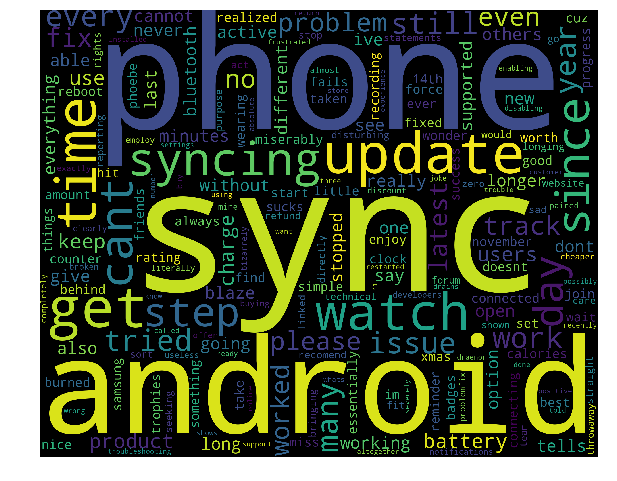

In [11]:
wordcloud_draw(reviews_fitbit_cleaned)

Wordcloud shows that the FitBit App has issues in syncing, updating, logging, etc.

In [12]:
# next, we initialize VADER so we can use it within our Python script
sid = SentimentIntensityAnalyzer()
reviews_fitbit['scores'] = reviews_fitbit['Review'].apply(lambda x: sid.polarity_scores(x))
reviews_fitbit['sent_textblob']=reviews_fitbit['Review'].apply(lambda x: TextBlob(x).polarity)
reviews_fitbit['compund_score']=reviews_fitbit['scores'].apply(lambda x: x['compound'])
#reviews_fitbit['sent_textblob_nb']=reviews_fitbit['Review'].apply(lambda x: TextBlob(x,analyzer = NaiveBayesAnalyzer()).sentiment.classification)
pd.set_option('display.max_colwidth', 150)
reviews_fitbit.head()

C:\Users\agadiya\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\agadiya\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\agadiya\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set o

,APP_ID,App_Name,Review,review_cleaned,scores,sent_textblob,compund_score
0,App_001,Fitbit,Not working or syncing since last update on the 14th of November. The clock is even 4 minutes behind and I can't fix that without connecting to my...,working syncing since last update 14th november clock even 4 minutes behind cant fix without connecting phone no longer able essentially simple st...,"{'neg': 0.071, 'neu': 0.887, 'pos': 0.042, 'compound': -0.2263}",0.057143,-0.2263
1,App_001,Fitbit,Sync fails miserably! Set to all day sync and always connected. I open the app and it has no data every time. I force sync it and 90% of the time ...,sync fails miserably set day sync always connected open no every time force sync 90 time still doesnt sync success reboot phone good work cant wai...,"{'neg': 0.093, 'neu': 0.821, 'pos': 0.086, 'compound': -0.1678}",-0.083333,-0.1678
2,App_001,Fitbit,This is the best app ever! It tells you more then just how many steps you have taken. It tells you calories burned how many minutes you have been ...,best ever tells many steps taken tells calories burned many minutes active active gives little reminder really enjoy get badges trophies amount st...,"{'neg': 0.0, 'neu': 0.804, 'pos': 0.196, 'compound': 0.9661}",0.264583,0.9661
3,App_001,Fitbit,This app has been a hit or miss from the start. There is a update that still has not fix the problem. When longing in it says 0 and it is linked t...,hit miss start update still fix problem longing says 0 linked watch get rights steps go website sad cant get act straight would recomend please st...,"{'neg': 0.129, 'neu': 0.817, 'pos': 0.054, 'compound': -0.5864}",-0.040909,-0.5864
4,App_001,Fitbit,Has stopped syncing. Has not worked since latest Android. I will be seeking a refund directly from FitBit as this product is now not fit for purpo...,stopped syncing worked since latest android seeking refund directly product fit purpose disturbing many users reporting issue shown zero care thro...,"{'neg': 0.117, 'neu': 0.846, 'pos': 0.037, 'compound': -0.7105}",-0.028125,-0.7105


# Analysis for the MedLife App

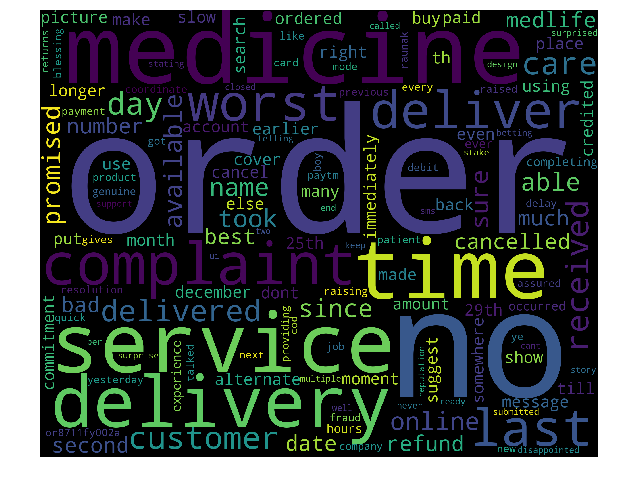

In [13]:
reviews_med_cleaned = reviews_med['review_cleaned']
wordcloud_draw(reviews_med_cleaned)

Wordcloud shows that the Medlife faces the operational issues as they face complaints on their delivery and order services

In [17]:
reviews_med['scores'] = reviews_med['Review'].apply(lambda x: sid.polarity_scores(x))
reviews_med['sent_textblob']=reviews_med['Review'].apply(lambda x: TextBlob(x).polarity)
reviews_med['compund_score']=reviews_med['scores'].apply(lambda x: x['compound'])
#reviews_med['sent_textblob_nb']=reviews_med['Review'].apply(lambda x: TextBlob(x,analyzer = NaiveBayesAnalyzer()).sentiment.classification)
pd.set_option('display.max_colwidth', 150)
reviews_med.head()

C:\Users\agadiya\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\agadiya\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\agadiya\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_

,APP_ID,App_Name,Review,review_cleaned,scores,sent_textblob,compund_score
27,App_004,Medlife,Worst service.. They are not able to deliver order at right time. I place my order on 20 th of December and he promised to deliver in 25th to 29th...,worst service able deliver order right time place order 20 th december promised deliver 25th 29th took longer time even able deliver order make su...,"{'neg': 0.068, 'neu': 0.851, 'pos': 0.08, 'compound': -0.0772}",-0.184048,-0.0772
28,App_004,Medlife,There is no picture of medicine cover i put medicine name in search it show 3 medicine with same name.,no picture medicine cover put medicine name search show 3 medicine name,"{'neg': 0.115, 'neu': 0.885, 'pos': 0.0, 'compound': -0.296}",0.000000,-0.2960
29,App_004,Medlife,"Last month medicine ordered and paid online. Since the same was not available, it was cancelled and alternate medicine order took by customer care...",last month medicine ordered paid online since available cancelled alternate medicine order took customer care immediately received message refund ...,"{'neg': 0.184, 'neu': 0.716, 'pos': 0.1, 'compound': -0.5283}",0.042857,-0.5283
30,App_004,Medlife,"Don't suggest medlife, as no commitment and no customer service. They cancel order at last moment where we do not have time to buy from somewhere ...",dont suggest medlife no commitment no customer service cancel order last moment time buy somewhere else completing 48 hours cancelled order,"{'neg': 0.215, 'neu': 0.718, 'pos': 0.067, 'compound': -0.5859}",0.000000,-0.5859
31,App_004,Medlife,Very very bad experience ever occurred. My order number in medlife is OR8711FY-002A. Very much delay in delivery... I am raising complaints since ...,bad experience ever occurred order number medlife or8711fy002a much delay delivery raising complaints since last 3 days every time new complaint r...,"{'neg': 0.24, 'neu': 0.681, 'pos': 0.079, 'compound': -0.7891}",-0.182900,-0.7891
